In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
%config InlineBackend.figure_format = 'retina'
# np.random.seed(0)

There are now 7 possible stimulus levels. Ordered by positivity they are

-3, -2, -1, 0, 1, 2, 3

Therefore we choose -3 as the baseline stimulus and analyse the responses in pairs

In [ ]:
df = pd.read_csv('data/experiment2.csv')

In [19]:
df = pd.DataFrame({'Participant name': ['p1','p1','p1','p1','p2','p1','p2','p2'], 
                         'Image':[-3,-2,-2,-1,0,1,2,3], 
                         'Response': [0,1,0,0,0,1,1,1]})
df

,Participant name,Image,Response
0,p1,-3,0
1,p1,-2,1
2,p1,-2,0
3,p1,-1,0
4,p2,0,0
5,p1,1,1
6,p2,2,1
7,p2,3,1


-3 as no_stim vs -2 as stim

In [20]:
ratings = df.groupby("Image")["Response"].count()
ratings

Image
-3    1
-2    2
-1    1
 0    1
 1    1
 2    1
 3    1
Name: Response, dtype: int64

In [18]:
P_TP1 = np.sum(responses) / len(responses)
P_TP2 = np.sum(responses > c2) / len(responses)
P_TP3 = np.sum(responses > c3) / len(responses)
P_TP4 = np.sum(responses > c4) / len(responses)

In [ ]:
P_FP1t, P_FP2t, P_FP3t = stats.norm.ppf([P_FP1, P_FP2, P_FP3])
P_TP1t, P_TP2t, P_TP3t = stats.norm.ppf([P_TP1, P_TP2, P_TP3])
line = stats.linregress([P_FP1t, P_FP2t, P_FP3t], [P_TP1t, P_TP2t, P_TP3t])
a = line.slope
b = line.intercept
a, b # sigma, mu

(0.8956389954894739, 0.7154946149441591)

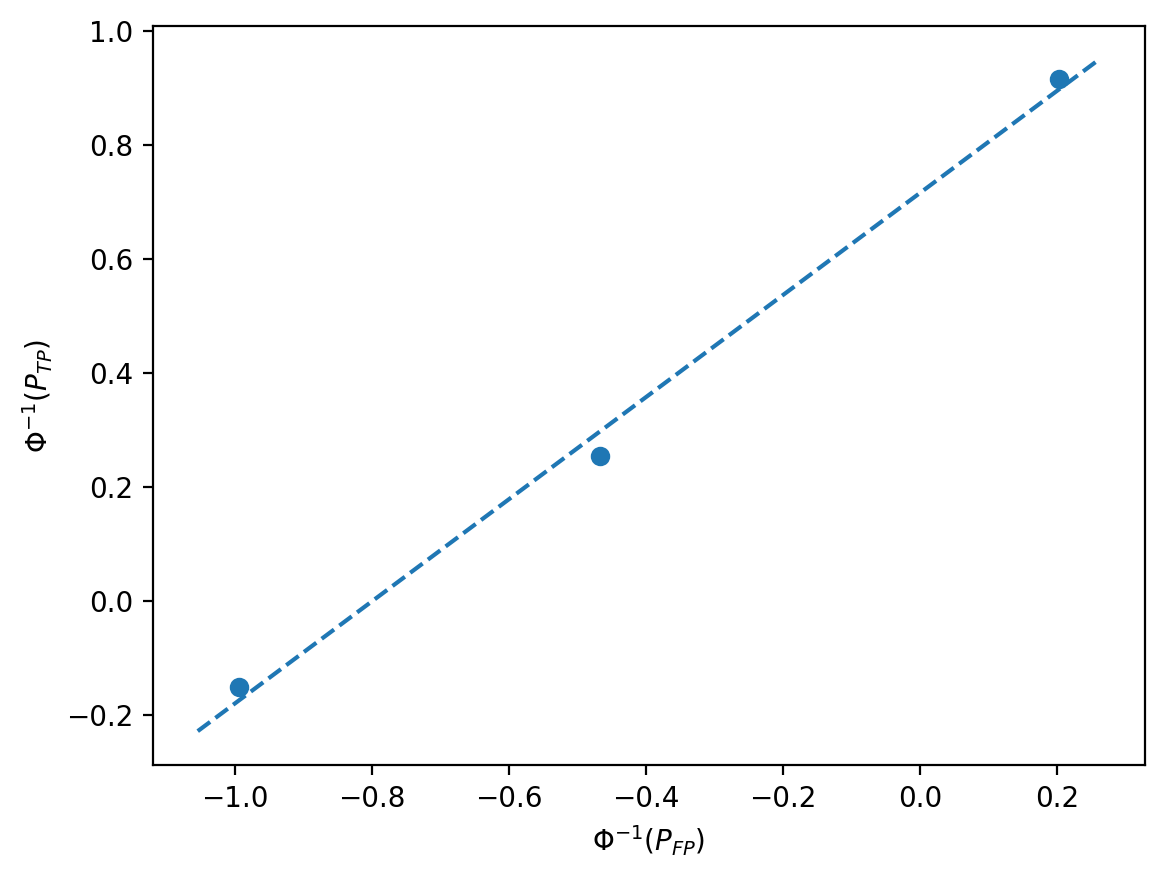

In [ ]:
def abline(slope, intercept):
    """Plot a line from slope and intercept
    http://stackoverflow.com/questions/7941226/ddg#43811762
    """
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    return np.linspace(x_vals[0], x_vals[1], 100), np.linspace(y_vals[0], y_vals[1], 100)

plt.scatter([P_FP1t, P_FP2t, P_FP3t], [P_TP1t, P_TP2t, P_TP3t])
plt.xlabel('$\Phi^{-1}(P_{FP})$')
plt.ylabel('$\Phi^{-1}(P_{TP})$')
# plt.xlim(0, 1); plt.ylim(0, 1)
# sigma is the slope and c is the intercept
rocx, rocy = abline(a, b)

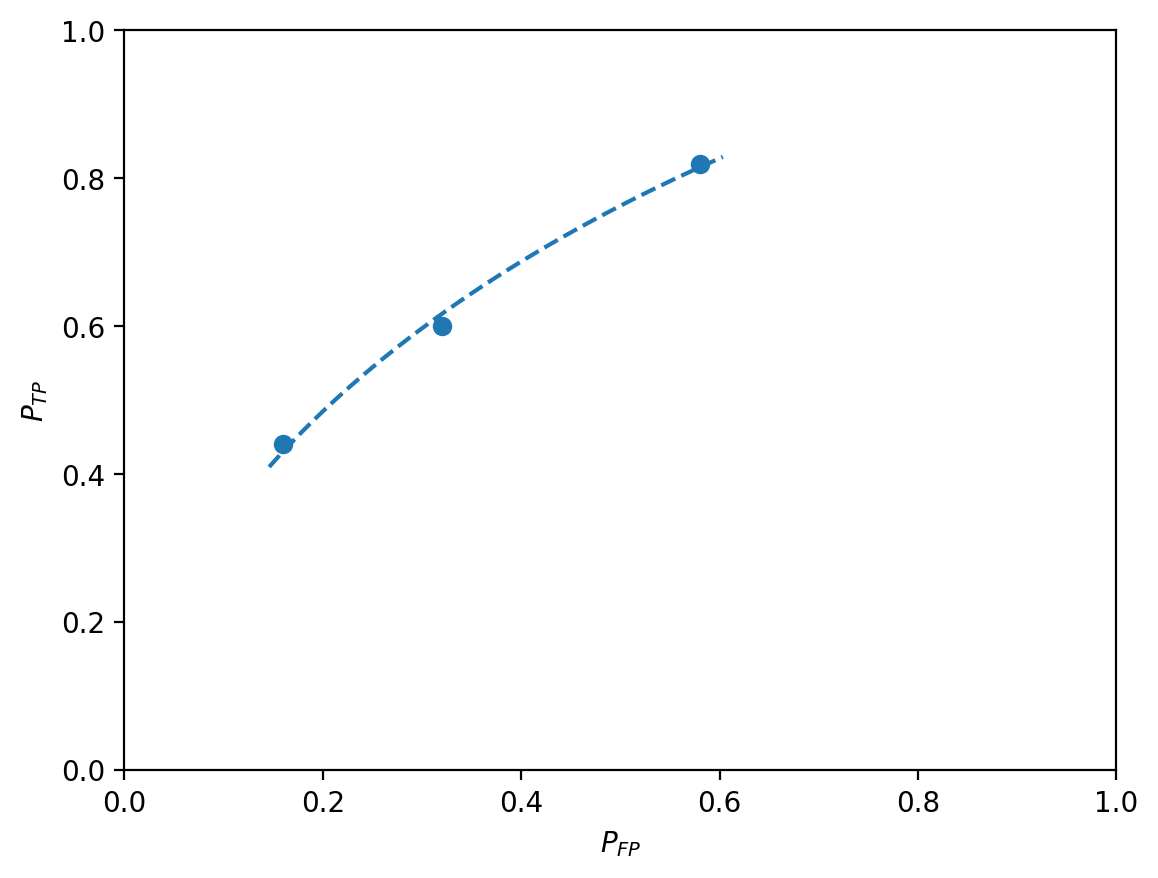

In [ ]:
P_FP1, P_FP2, P_FP3 = stats.norm.cdf([P_FP1t, P_FP2t, P_FP3t])
P_TP1, P_TP2, P_TP3 = stats.norm.cdf([P_TP1t, P_TP2t, P_TP3t])
ROCx = stats.norm.cdf(rocx)
ROCy = stats.norm.cdf(rocy)
plt.scatter([P_FP1, P_FP2, P_FP3], [P_TP1, P_TP2, P_TP3])
plt.plot(ROCx, ROCy, '--')
plt.xlabel('$P_{FP}$')
plt.ylabel('$P_{TP}$')
plt.xlim(0, 1); plt.ylim(0, 1);

In [ ]:
def AUC(mu, sigma):
    '''Area Under the Curve (AUC) of the ROC curve when it is not probit transformed.'''
    return stats.norm.cdf(mu / np.sqrt(1 + sigma**2))
A = AUC(a, b)
A

0.7668140015137652